# Credit Risk Scoring Case Study

## Business Understanding

### Problem Statement:

* How can ABC BANK **maximize revenue from the loan business** by within the next 6 months, **without compromising the overall risk strategy**?

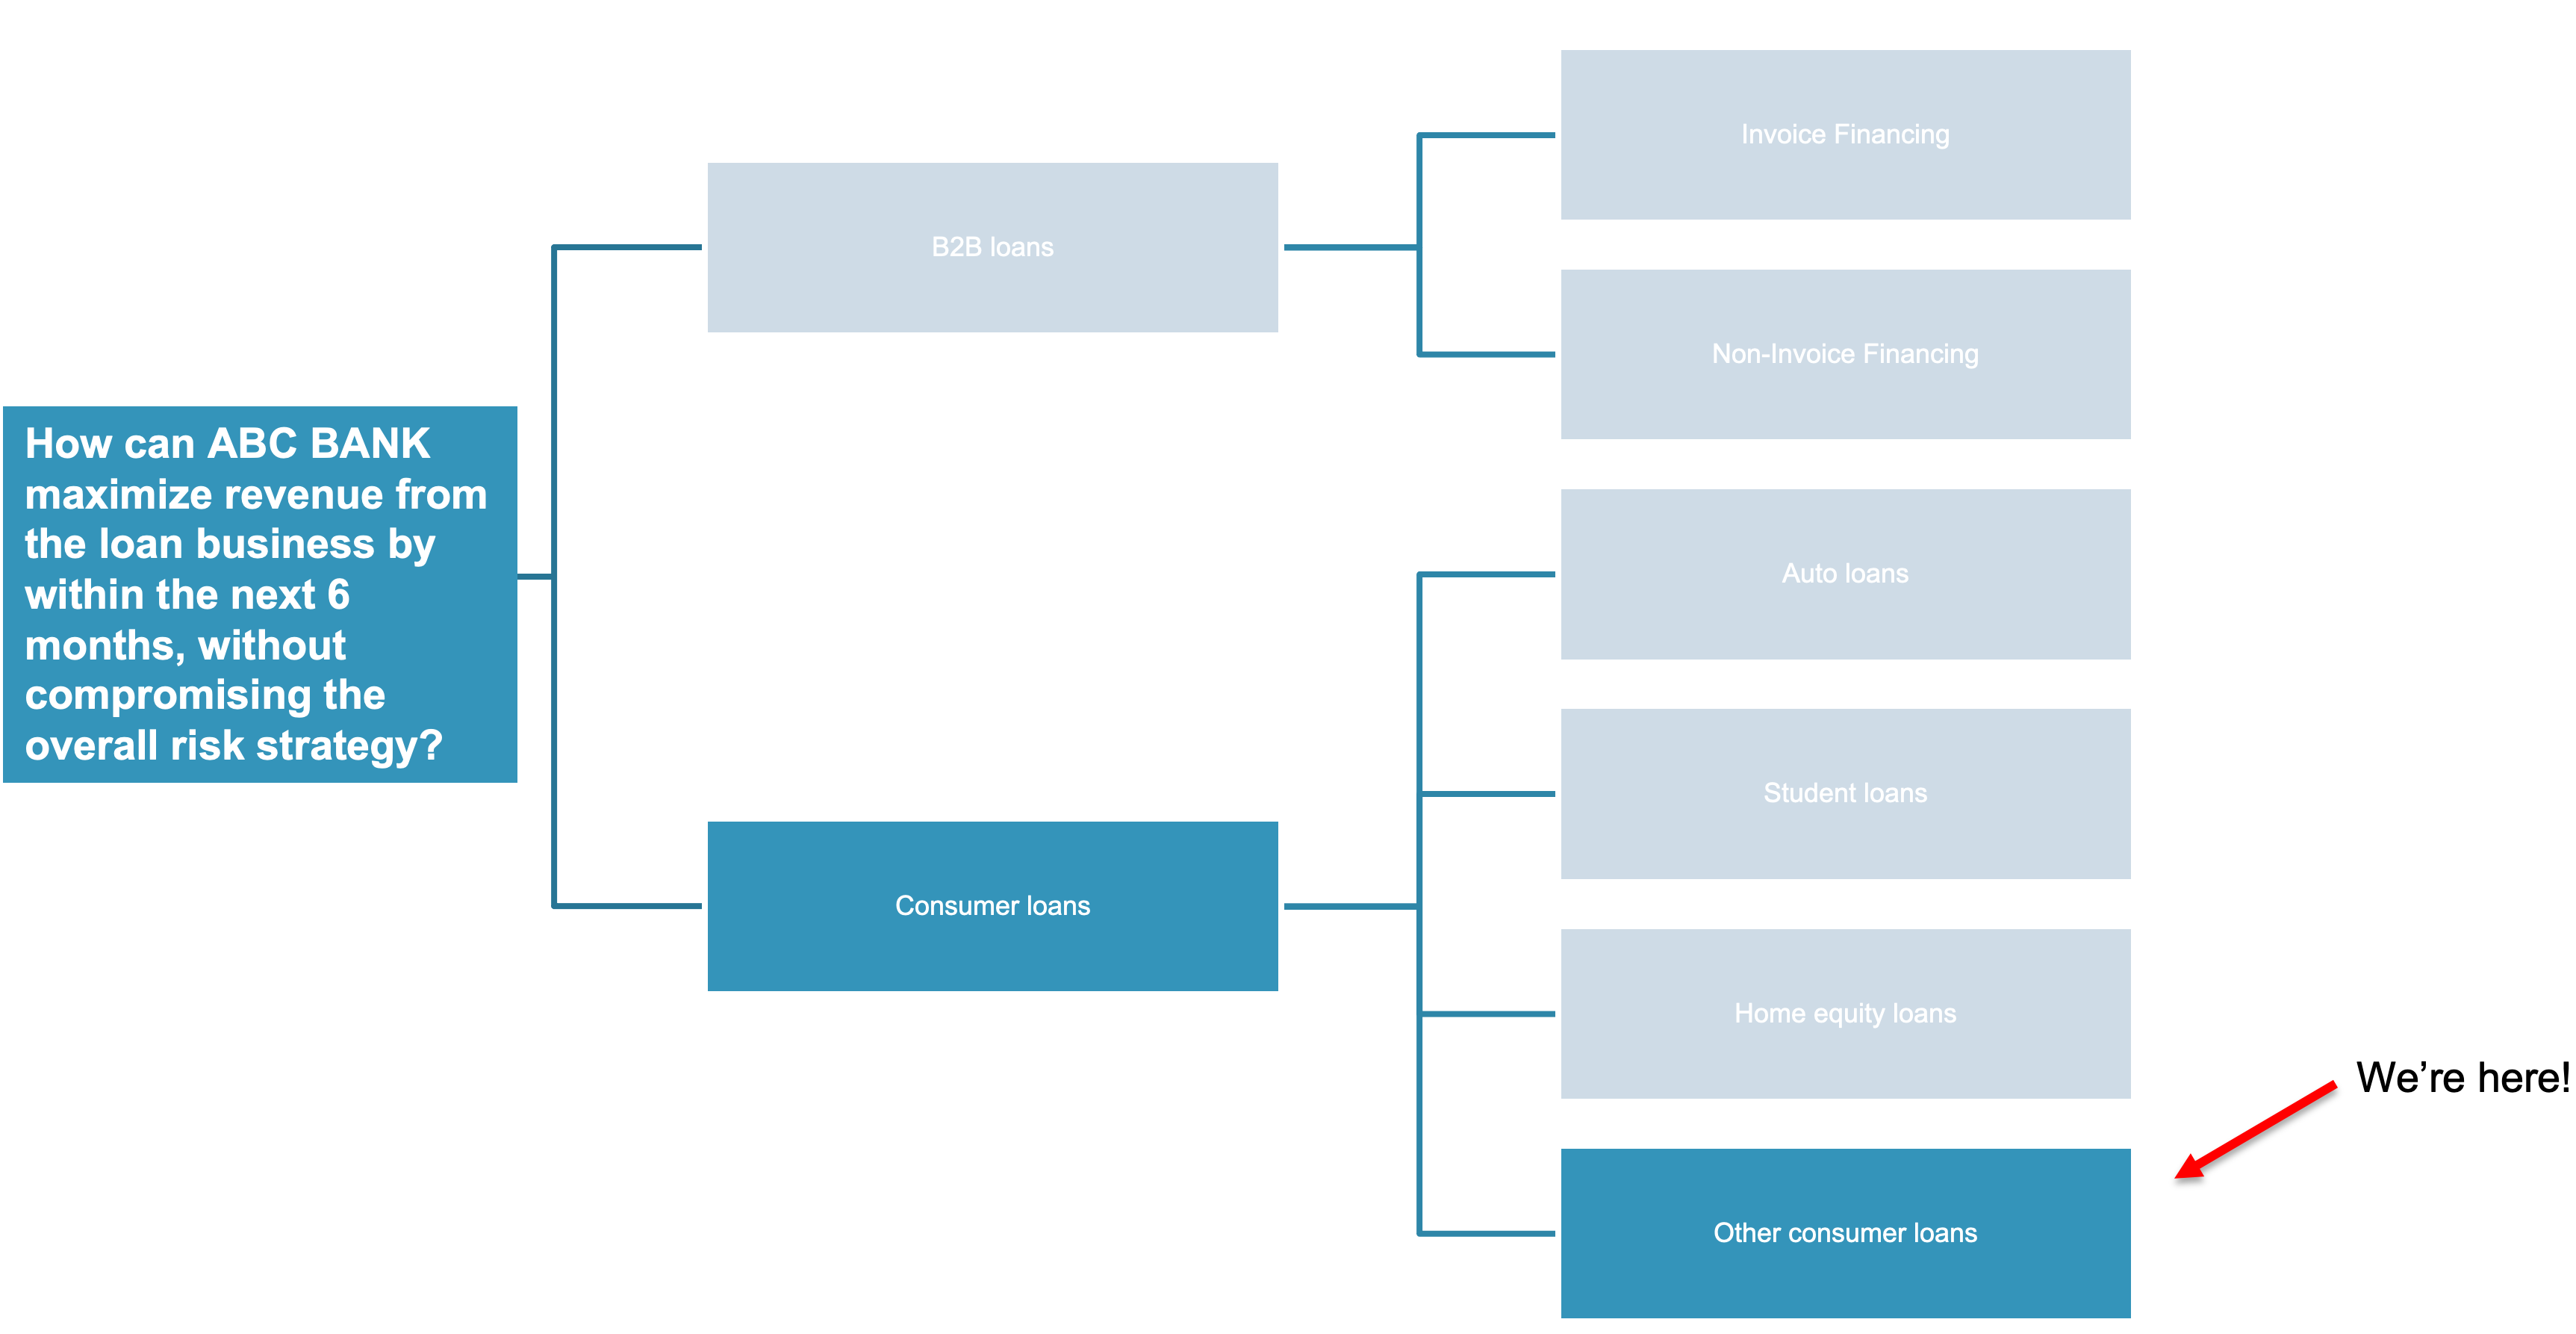

## Data

Dataset source: Ploytechnic University of Catalonia (https://www.cs.upc.edu/~belanche/Docencia/mineria/mineria.html)

In [1]:
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

--2023-03-06 10:53:37--  https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv [following]
--2023-03-06 10:53:38--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.2’

CreditScoring.csv.2 100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2023-03-06 10:53:38 (10.5 MB/s) - ‘CreditScoring.csv.2’ saved [182489/182489]



## Data Understanding

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


**Data Dictionary**

1. Status	- credit status
2. Seniority -	job seniority (years)
3. Home -	type of home ownership
4. Time -	time of requested loan
5. Age - client's age
6. Marital -	marital status
7. Records -	existance of records
8. Job -	type of job
9. Expenses -	monthly expenses
10. Income -	monthly income
11. Assets -	amount of assets
12. Debt -	amount of credit debt
13. Amount -	amount requested of loan
14. Price	- price of good

## Data Preprocessing

In [4]:
# Source: https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R

status_enc = {
    1: 'ok',
    2: 'default',
    3: 'unknown',
}

home_enc = {
    0: 'unknown',
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
}

marital_enc = {
    0: 'unknown',
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
}

records_enc = {
    0: 'unknown',
    1: 'no',
    2: 'yes',
}

job_enc = {
    0: 'unknown',
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
}

In [5]:
df['Status'] = df['Status'].map(status_enc)
df['Home'] = df['Home'].map(home_enc)
df['Marital'] = df['Marital'].map(marital_enc)
df['Records'] = df['Records'].map(records_enc)
df['Job'] = df['Job'].map(job_enc)

In [6]:
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


Check NA

In [7]:
df[df.isna().any(axis=1)]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
3309,NaN,10,private,60,25,single,no,fixed,35,148,3000,0,1500,1888


Check Numerical Values

In [8]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Encode Missing

In [9]:
for col in ['Income', 'Assets', 'Debt']:
    df[col] = df[col].replace(to_replace = 99999999, value = np.nan)

In [10]:
df.describe().round()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


Check NAs again

In [11]:
df[df.isna().any(axis=1)]

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
29,default,0,unknown,48,37,single,no,unknown,35,NaN,NaN,NaN,1500,1850
239,ok,3,unknown,24,42,single,no,fixed,35,337.0,NaN,NaN,1300,1624
393,default,1,owner,36,52,married,yes,freelance,60,NaN,100000.0,20000.0,1500,2340
734,default,30,owner,18,57,married,yes,freelance,75,290.0,NaN,0.0,350,450
803,ok,6,parents,24,25,single,no,fixed,35,NaN,5000.0,0.0,850,1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4192,default,0,owner,60,58,single,no,others,35,19.0,NaN,0.0,700,1332
4223,default,15,owner,24,47,married,yes,freelance,45,NaN,5000.0,0.0,250,500
4288,default,10,rent,36,35,single,no,freelance,40,50.0,NaN,NaN,500,1050
4433,ok,8,owner,48,40,single,no,freelance,35,NaN,5000.0,0.0,1200,1678


In [12]:
# Delete missing for this exercise
# Better way: Impute
df = df.drop(df[df.isna().any(axis=1)].index)
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4452,default,0,owner,24,37,married,no,parttime,60,90.0,3500.0,0.0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


Inspect Target

In [13]:
df['Status'].value_counts()

ok         3160
default    1217
Name: Status, dtype: int64

### EDA

In [14]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import sweetviz as sv

In [23]:
# Convert target to numeric
# 1... default
# 0... OK
# NaN... Unknown

status_feature_enc = {
    'ok': 0,
    'default': 1,
    'unknown': None,
}

df['Status_enc'] = df['Status'].map(status_feature_enc)
print(df[['Status', 'Status_enc']][:5])

    Status  Status_enc
0       ok         0.0
1       ok         0.0
2  default         1.0
3       ok         0.0
4       ok         0.0


In [24]:
report = sv.analyze(df, target_feat="Status_enc")

                                             |          | [  0%]   00:00 -> (? left)


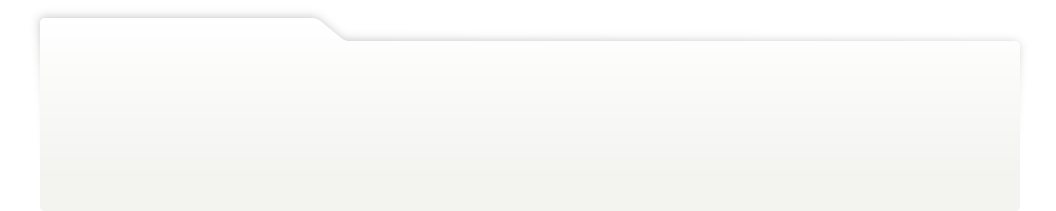
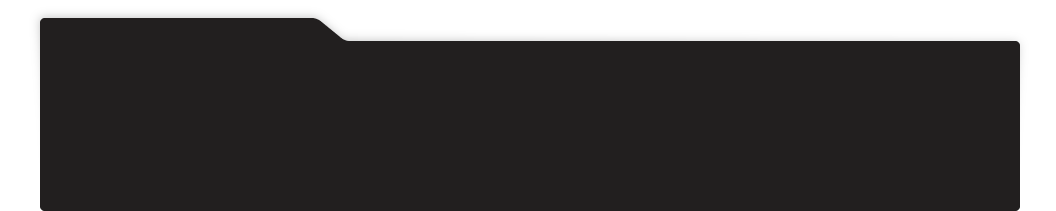
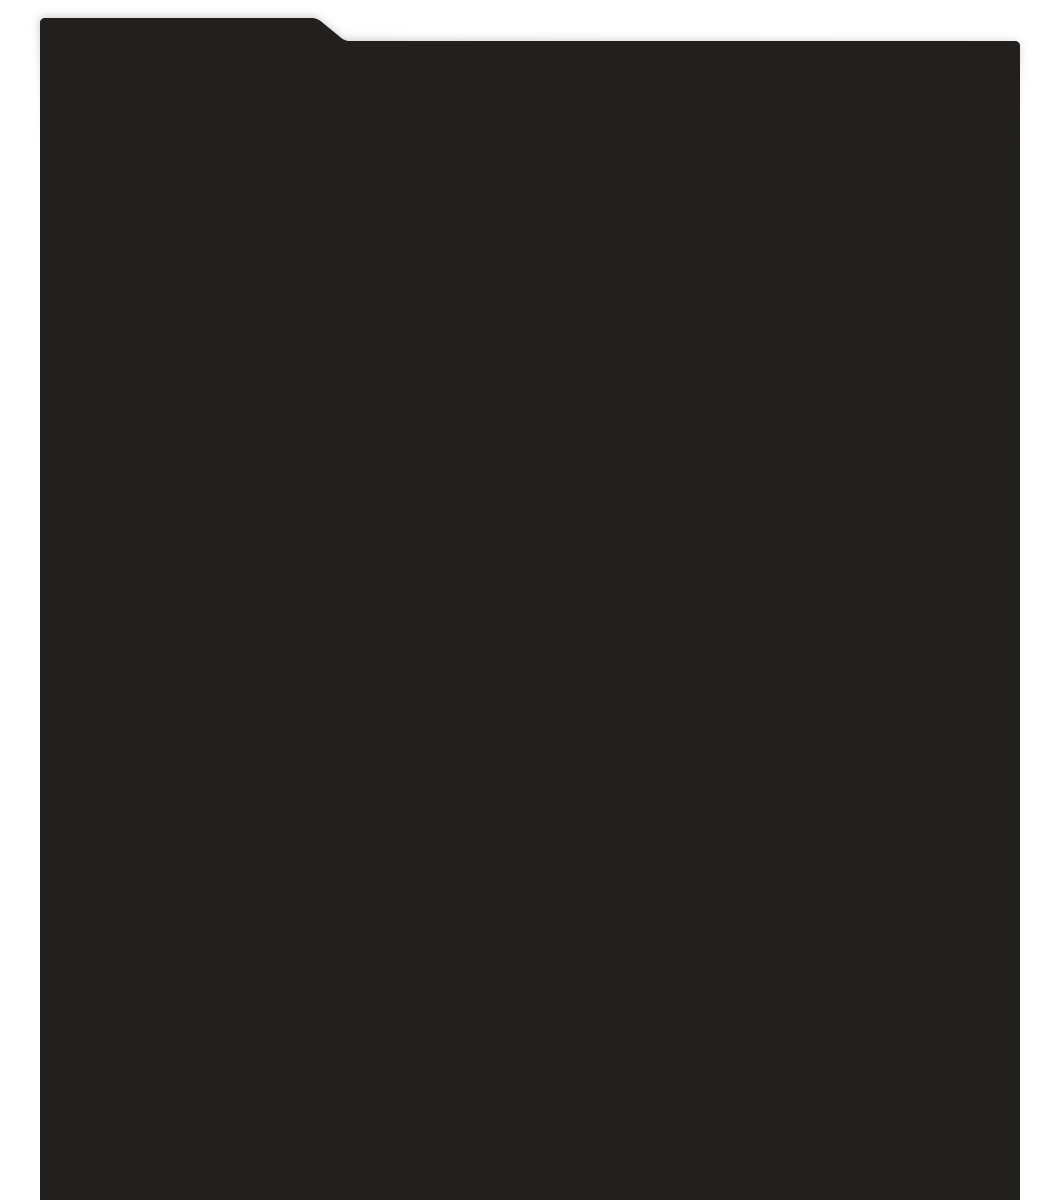
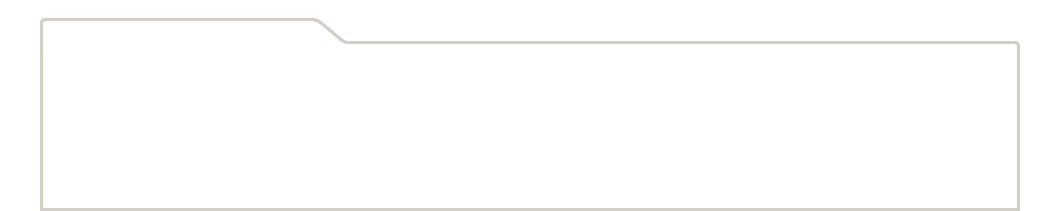
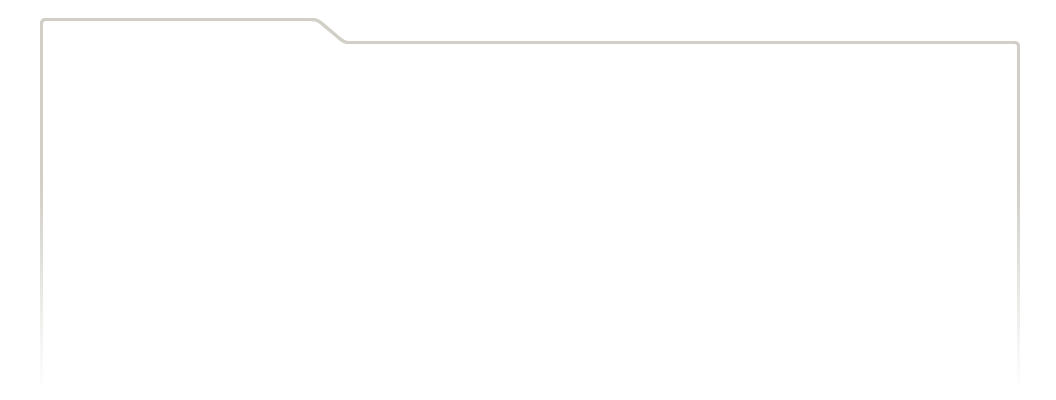
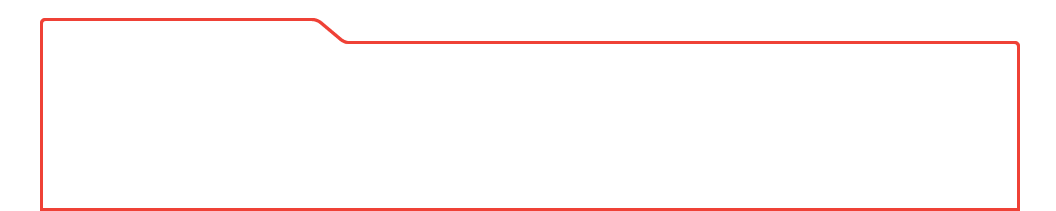
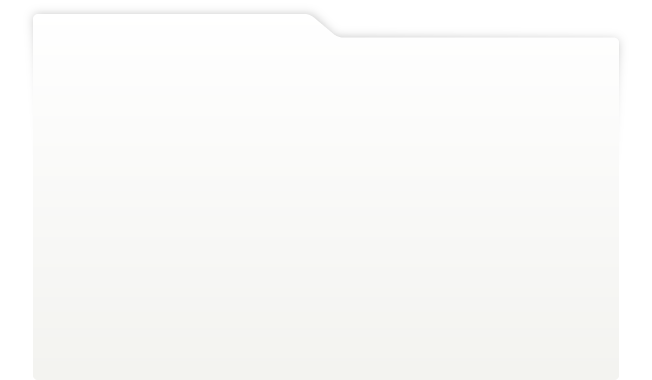
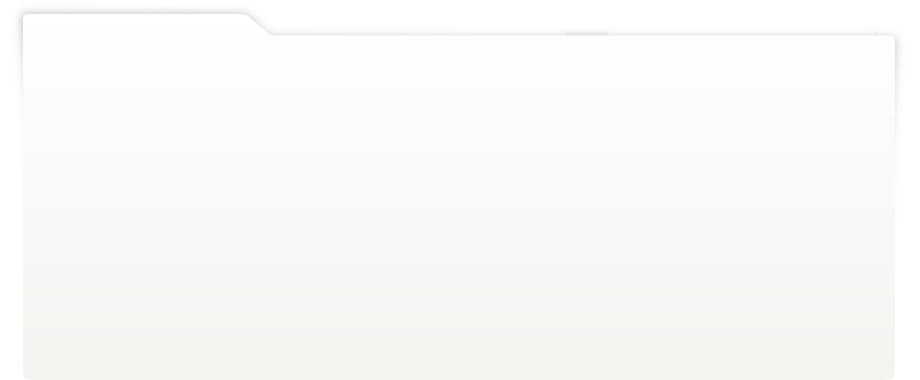
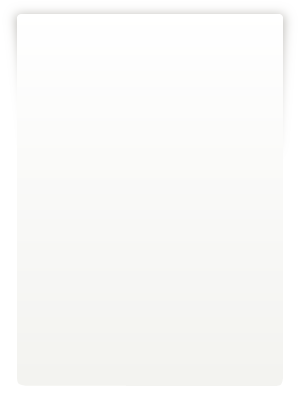
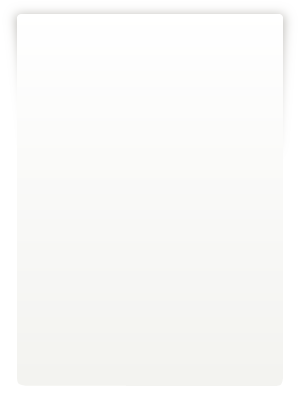
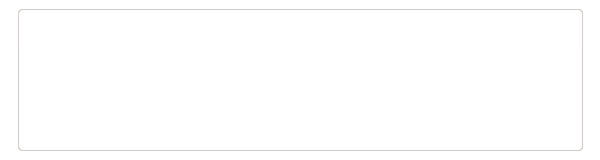
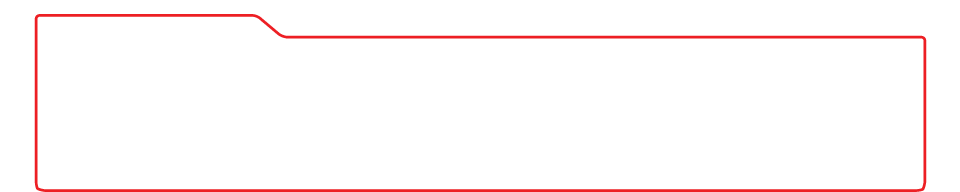
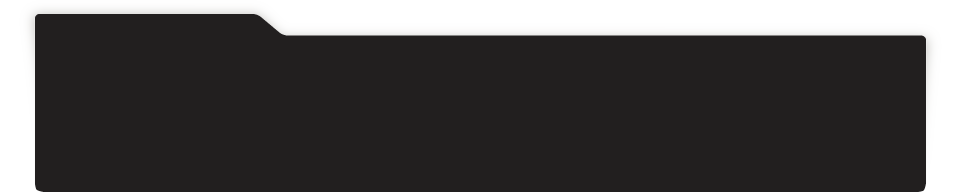
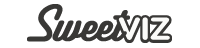
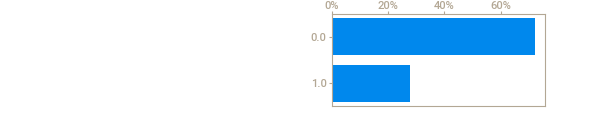
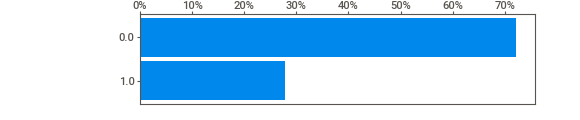
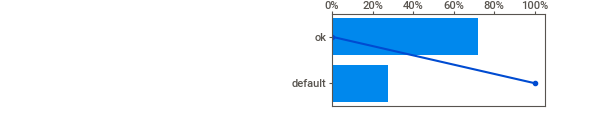
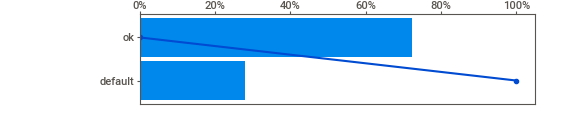
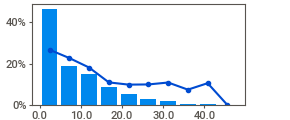
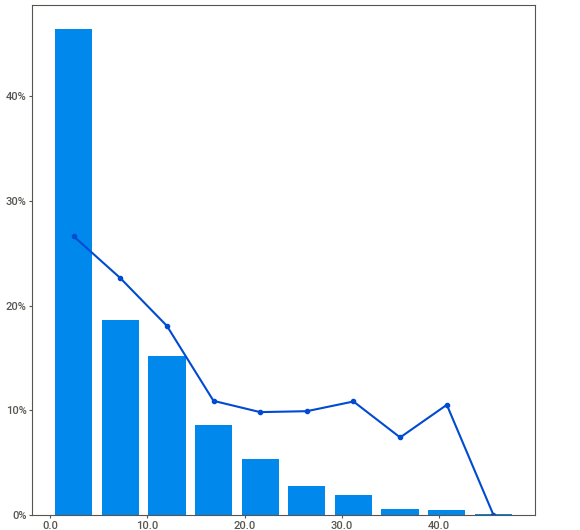
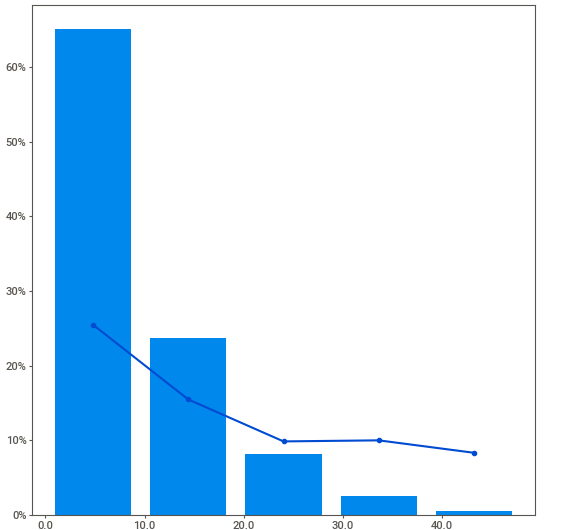
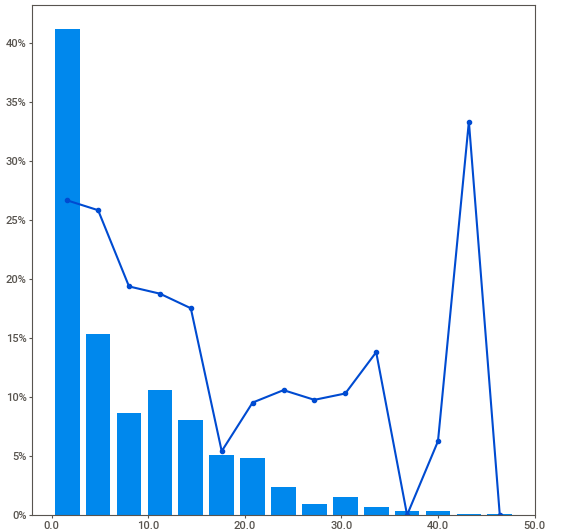
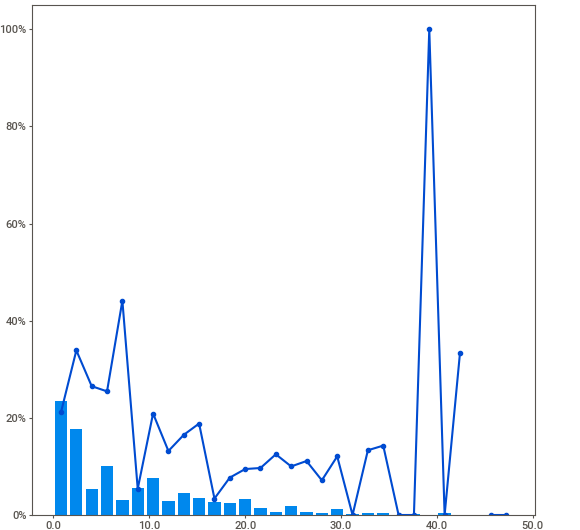
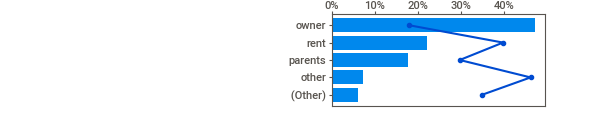
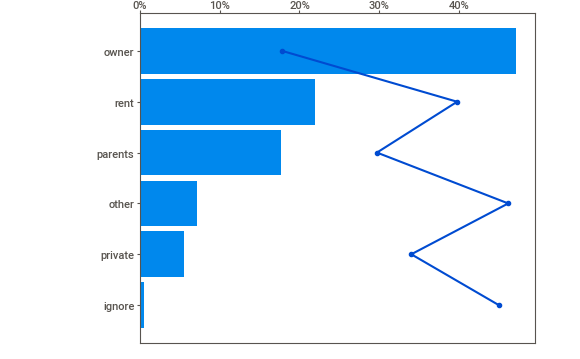
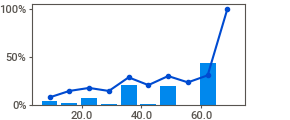
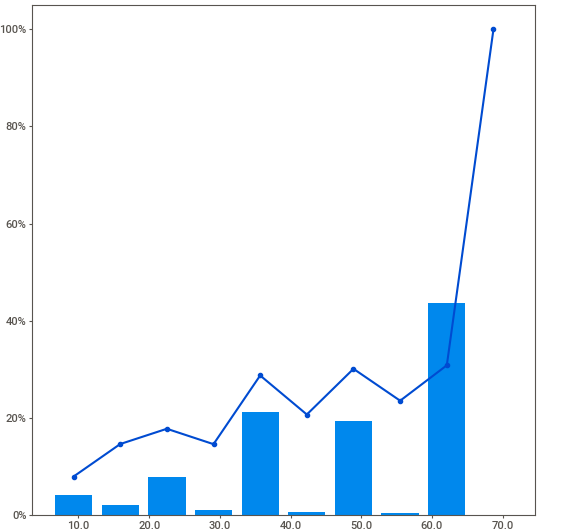
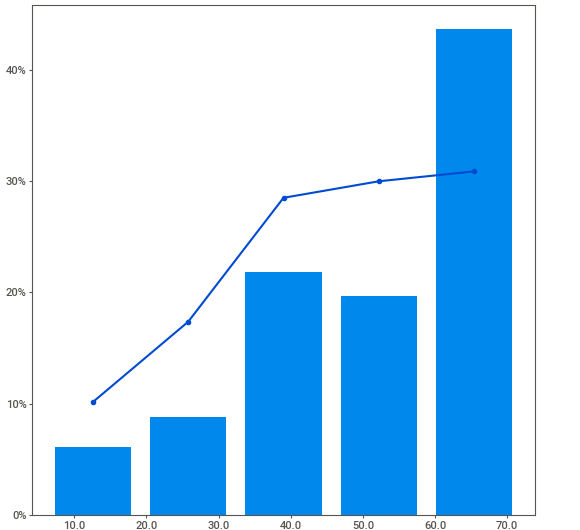
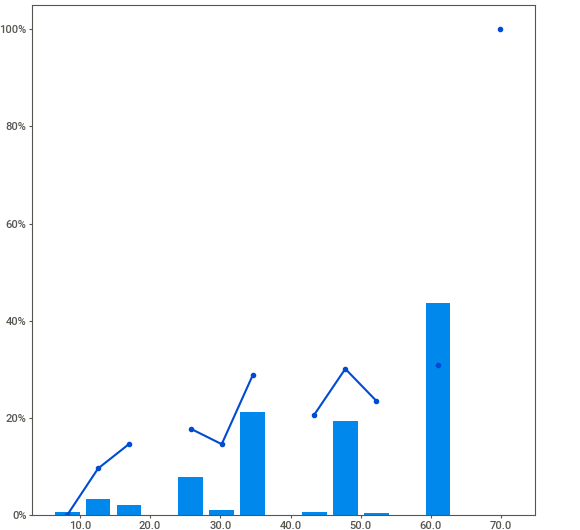
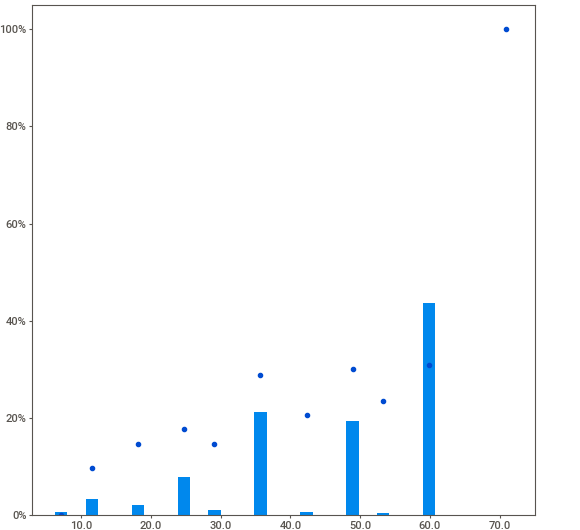
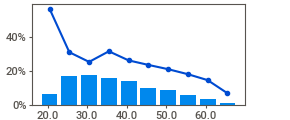
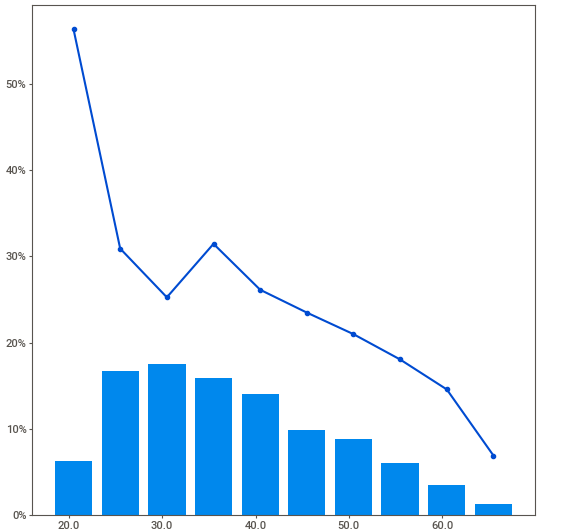
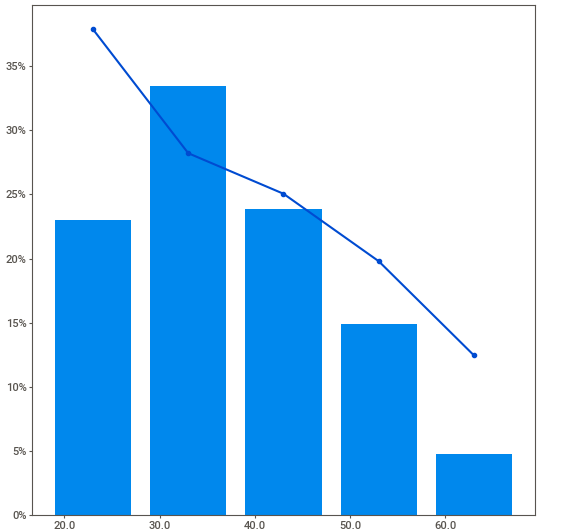
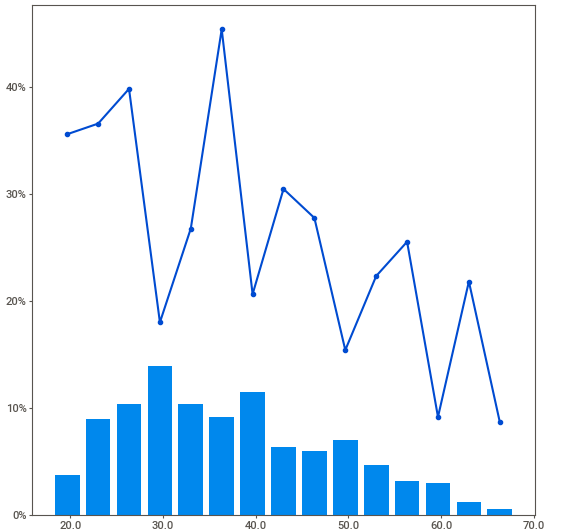
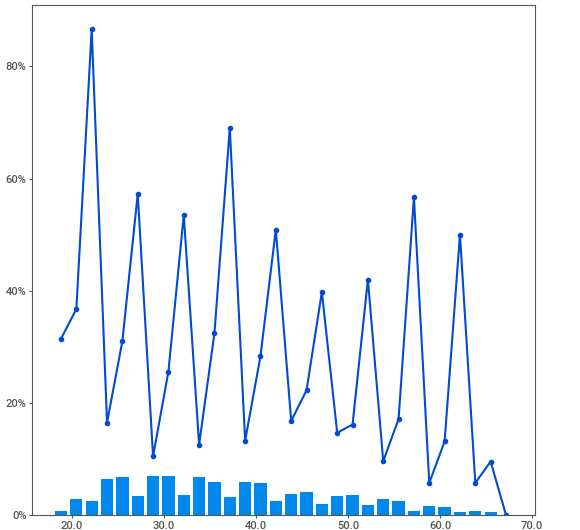
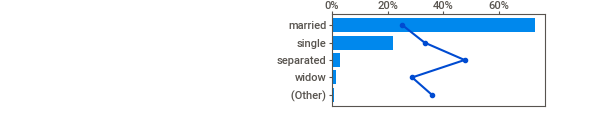
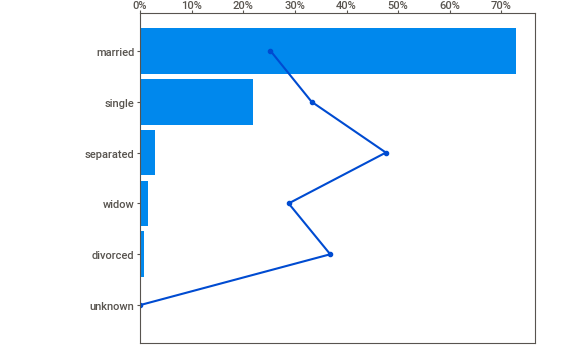
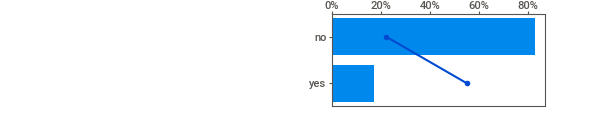
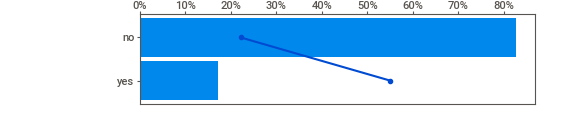
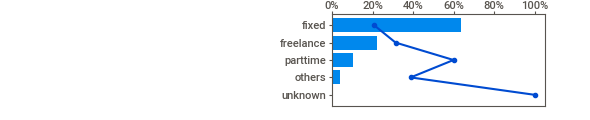
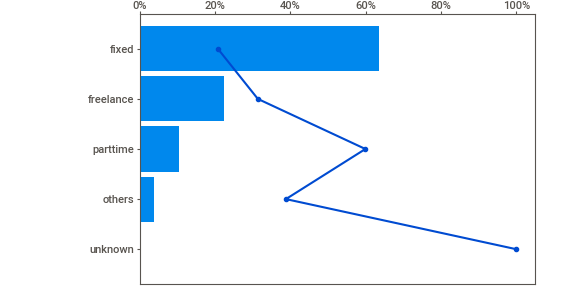
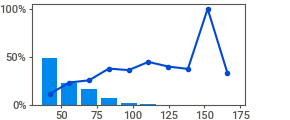
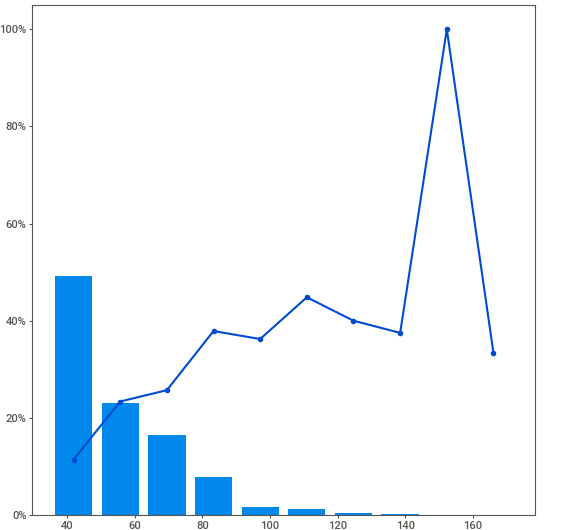
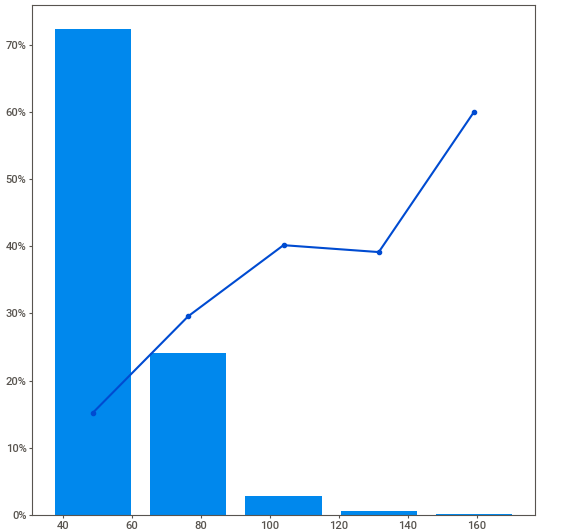
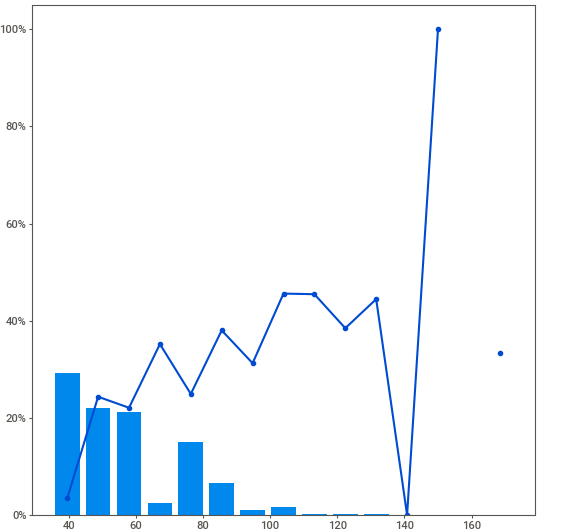
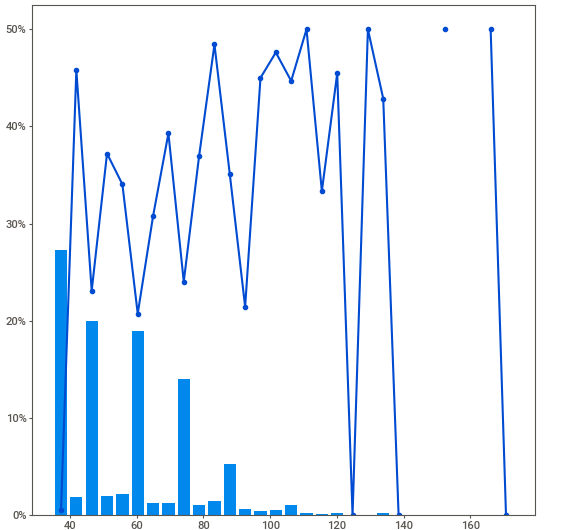
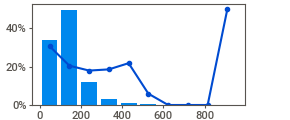
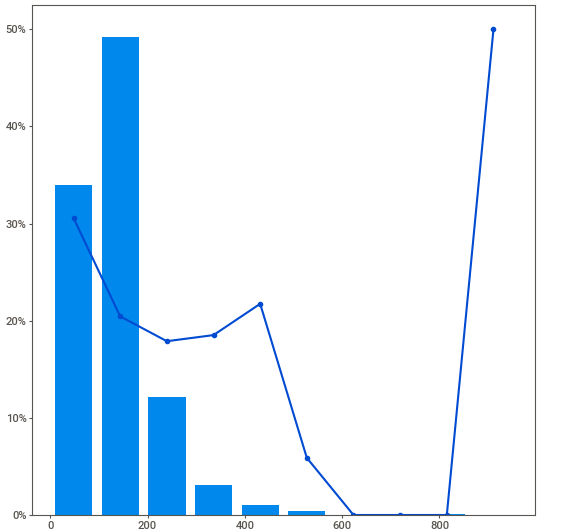
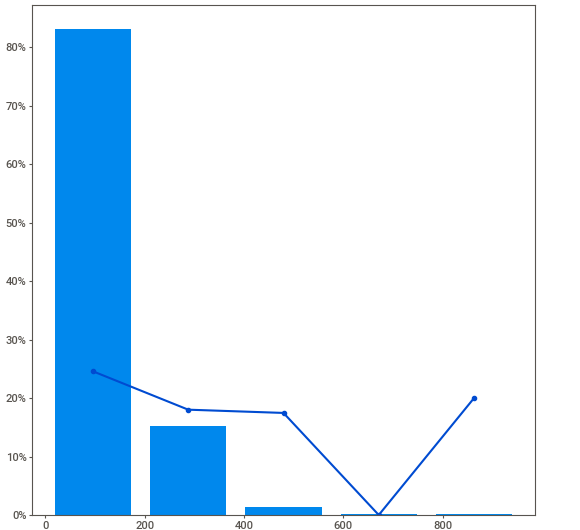
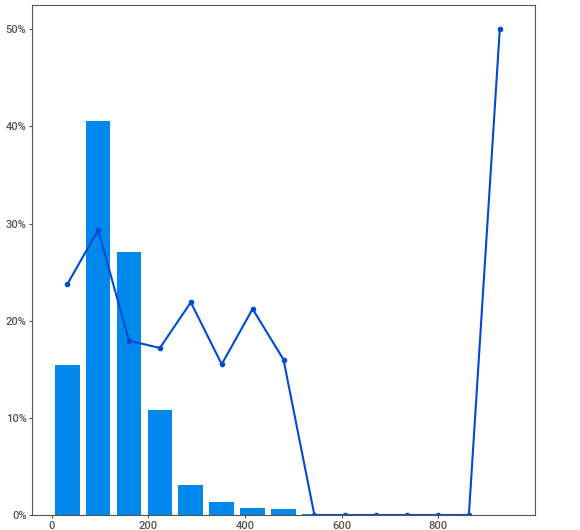
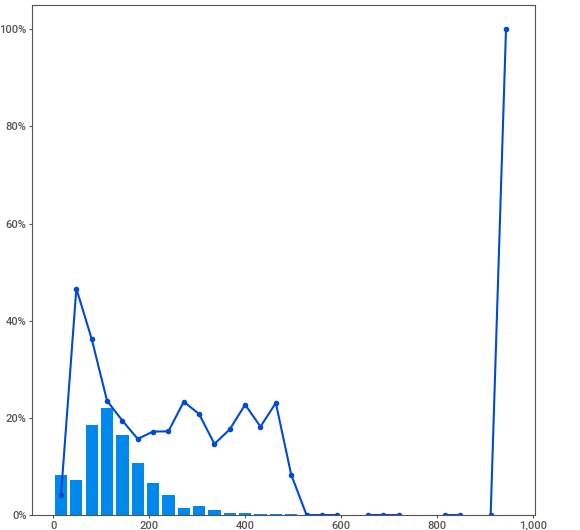
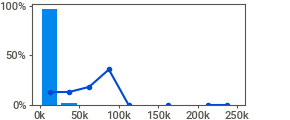
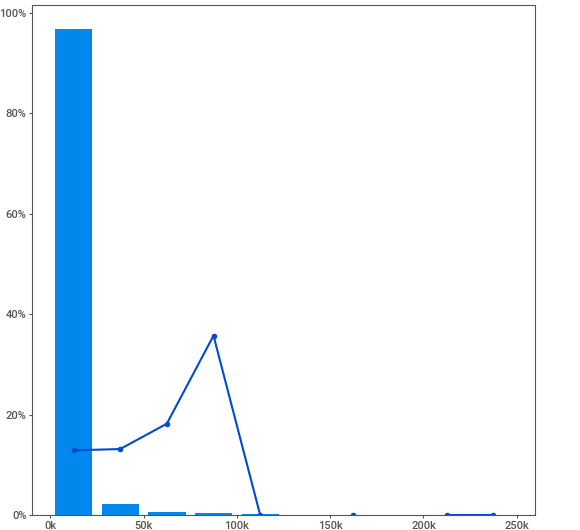
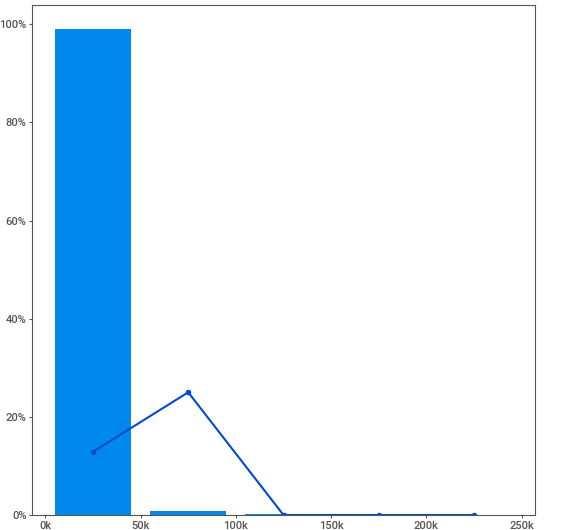
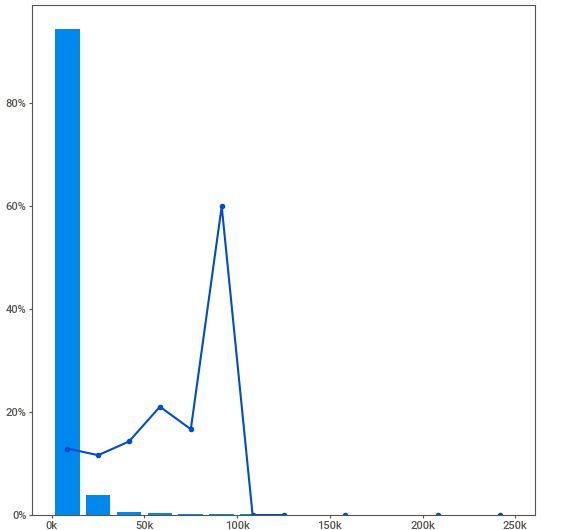
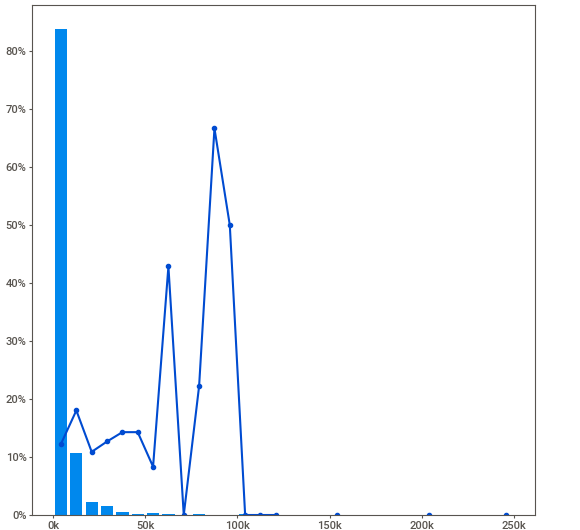
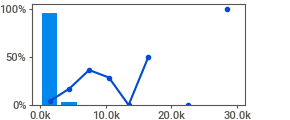
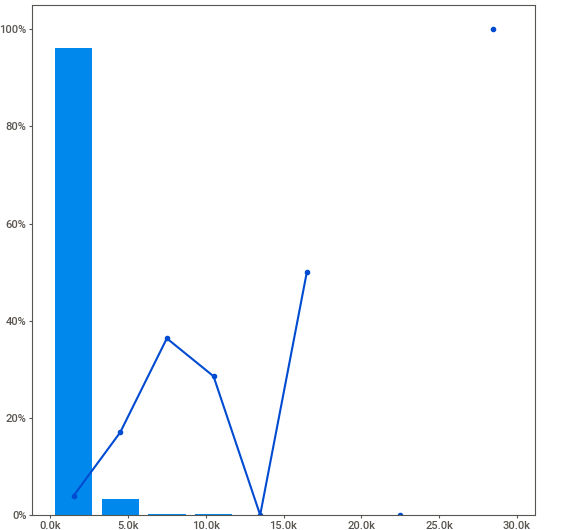
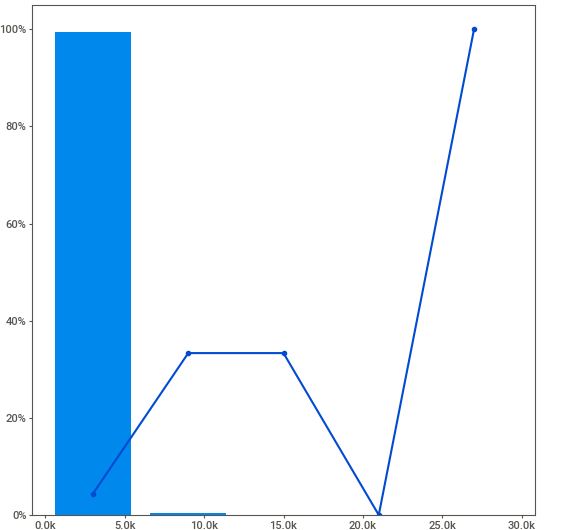
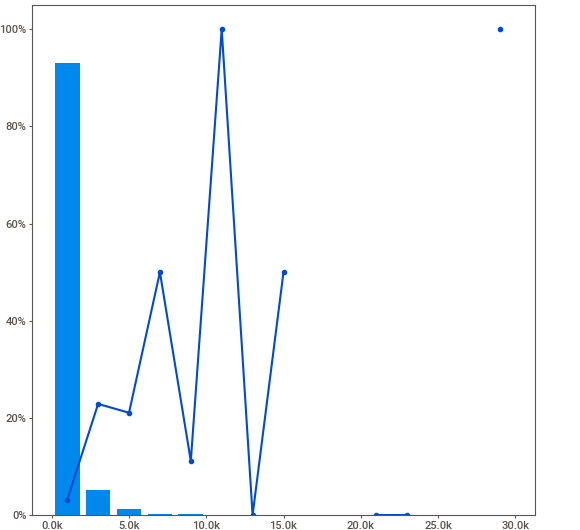
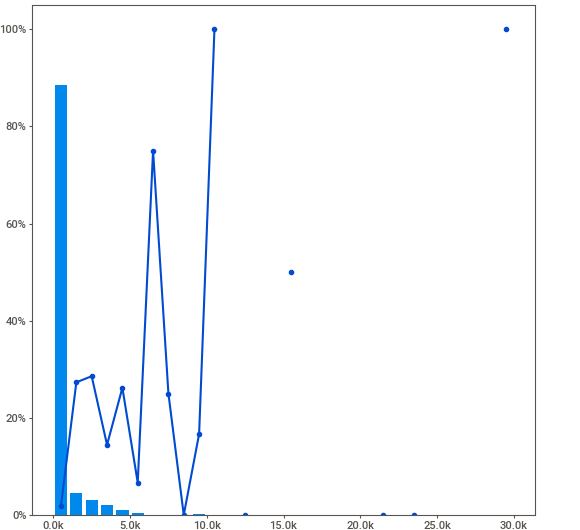
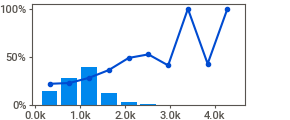
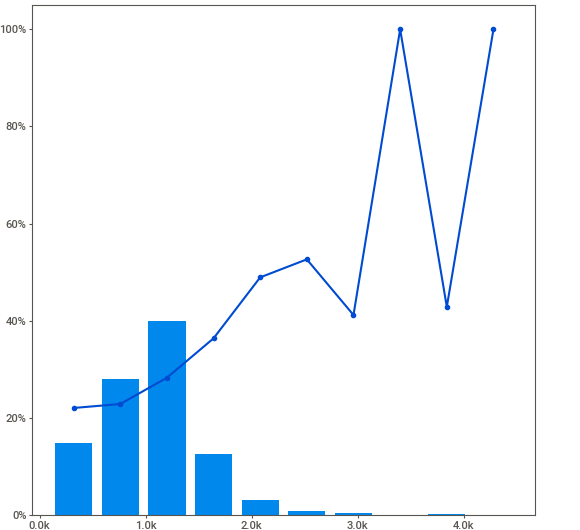
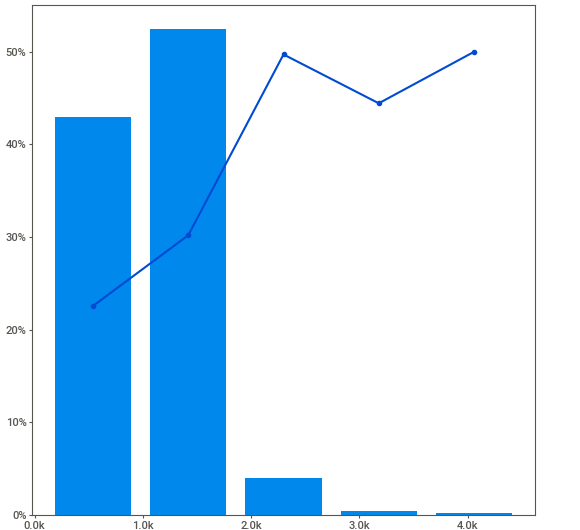
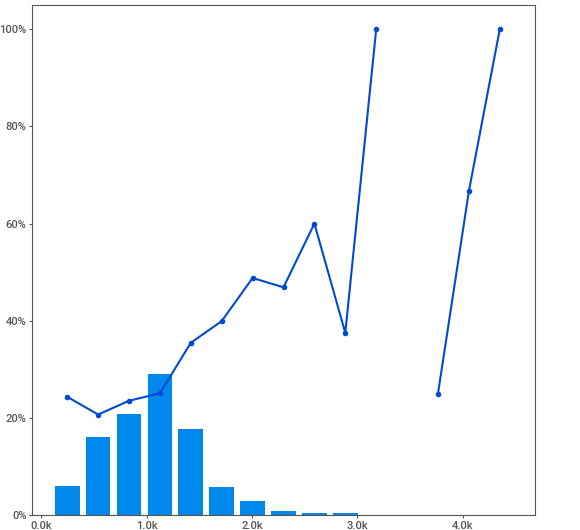
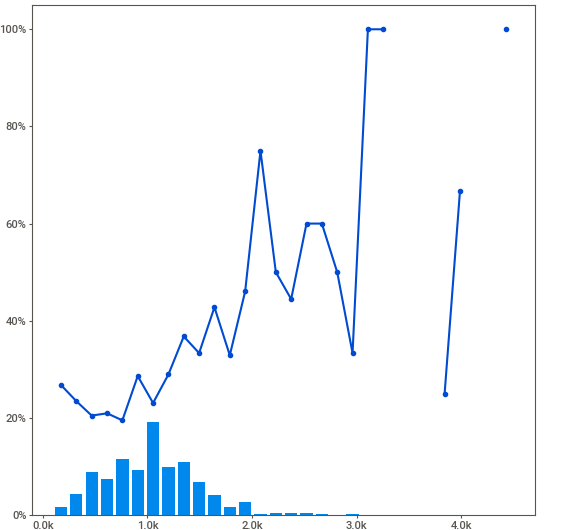
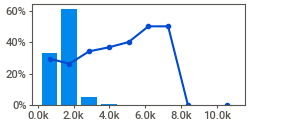
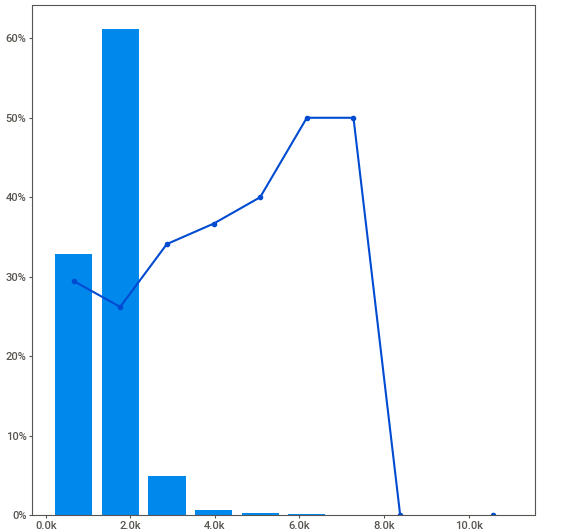
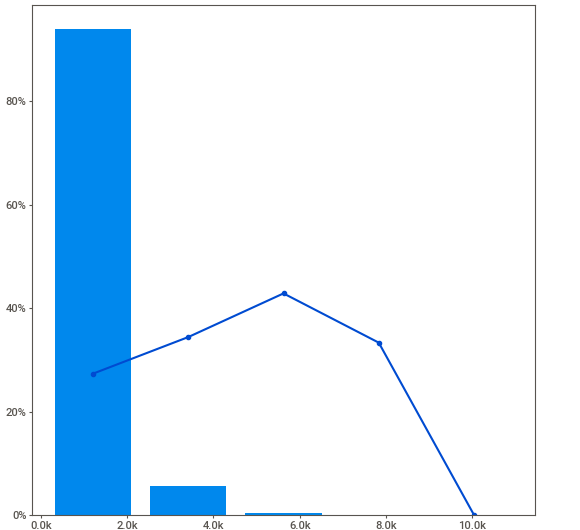
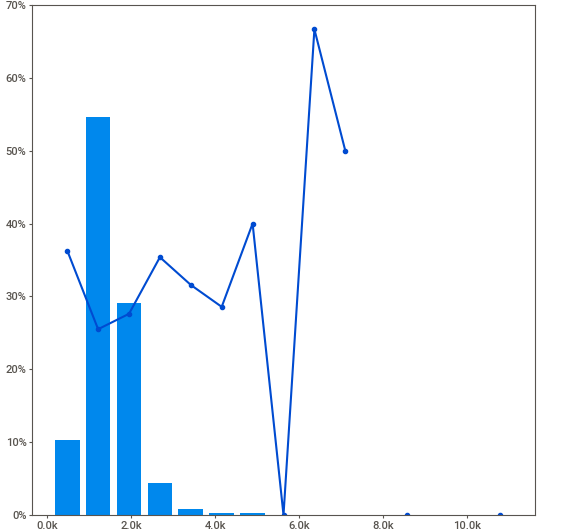
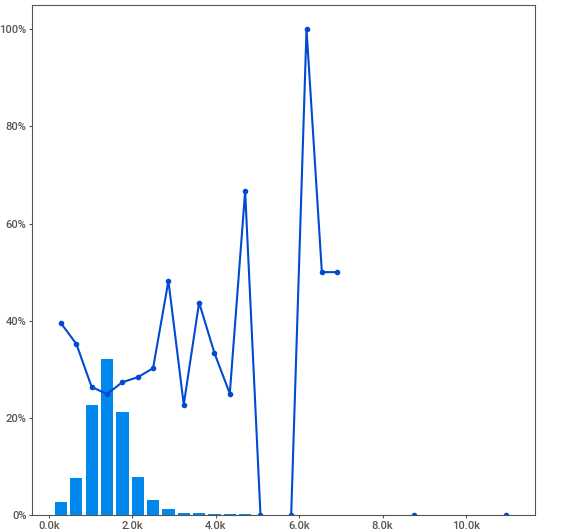
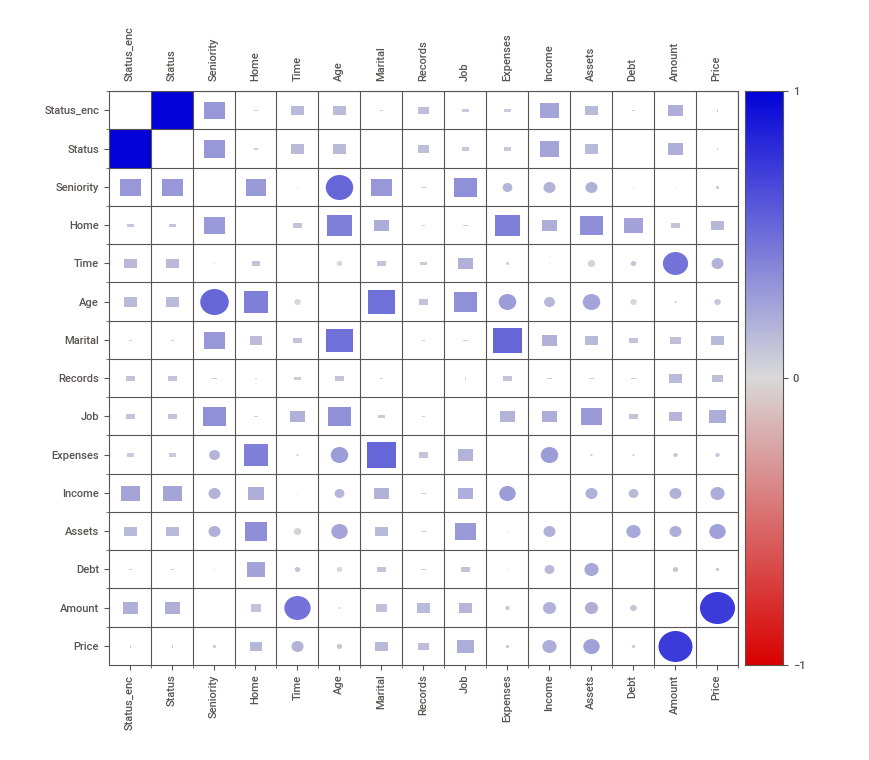
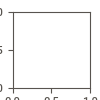

In [25]:
report.show_notebook()

In [26]:
# Remove encoded target
df = df.drop('Status_enc', axis = 1)

Export

In [27]:
# Use this file for modeling
df.to_csv("loans.csv", index = False)

## Predictive Analytics - Manual ML

### Train-Test Split

In [28]:
df = pd.read_csv("loans.csv")

In [29]:
from sklearn.model_selection import train_test_split

# candidate features
X = df.drop('Status', axis = 1)

# labels
y = df['Status']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [30]:
X_train

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
1440,11,owner,60,44,married,yes,fixed,60,130.0,3500.0,0.0,1400,1731
822,15,rent,60,33,married,yes,freelance,64,36.0,0.0,0.0,1150,1150
185,1,owner,48,31,married,no,fixed,75,201.0,2500.0,96.0,1100,1642
1213,5,owner,60,42,married,no,fixed,75,101.0,3500.0,0.0,1090,1190
918,3,owner,60,23,single,no,parttime,35,71.0,1500.0,0.0,1150,1386
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,2,owner,48,33,married,no,fixed,75,100.0,6500.0,2000.0,1000,1234
4060,2,owner,60,26,single,yes,fixed,35,110.0,7000.0,0.0,535,1710
1346,1,rent,48,39,married,no,fixed,86,105.0,0.0,0.0,1300,1600
3454,6,owner,60,33,married,yes,fixed,45,103.0,10000.0,0.0,1000,1658


### Feature engineering

#### Numerical features

In [31]:
# Get names of numerical columns
numeric_cols = X_train.describe().columns

# Select numerical columns
X_train_num = X_train[numeric_cols]

# Apply transformations
X_train_num = X_train_num.fillna(0) # Example

# Reset index for easier concatenation later
X_train_num = X_train_num.reset_index(drop = True)

In [32]:
X_train_num

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
0,11,60,44,60,130.0,3500.0,0.0,1400,1731
1,15,60,33,64,36.0,0.0,0.0,1150,1150
2,1,48,31,75,201.0,2500.0,96.0,1100,1642
3,5,60,42,75,101.0,3500.0,0.0,1090,1190
4,3,60,23,35,71.0,1500.0,0.0,1150,1386
...,...,...,...,...,...,...,...,...,...
3496,2,48,33,75,100.0,6500.0,2000.0,1000,1234
3497,2,60,26,35,110.0,7000.0,0.0,535,1710
3498,1,48,39,86,105.0,0.0,0.0,1300,1600
3499,6,60,33,45,103.0,10000.0,0.0,1000,1658


#### Categorical features

In [33]:
categories = [list(home_enc.values()), 
              list(marital_enc.values()), 
              list(records_enc.values()), 
              list(job_enc.values())]

# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, categories = categories)

X_train_categorical = X_train[['Home', 'Marital', 'Records', 'Job']]
X_train_categorical = onehot_encoder.fit_transform(X_train_categorical)

X_train_categorical = pd.DataFrame(X_train_categorical, columns=onehot_encoder.get_feature_names_out())
X_train_categorical

,Home_unknown,Home_rent,Home_owner,Home_private,Home_ignore,Home_parents,Home_other,Marital_unknown,Marital_single,Marital_married,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3498,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3499,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Combine numerical and categorical features

In [34]:
X_train_fe = pd.concat([X_train_num, X_train_categorical], axis = 1)

In [35]:
X_train_fe

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price,Home_unknown,...,Marital_separated,Marital_divorced,Records_unknown,Records_no,Records_yes,Job_unknown,Job_fixed,Job_parttime,Job_freelance,Job_others
0,11,60,44,60,130.0,3500.0,0.0,1400,1731,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,15,60,33,64,36.0,0.0,0.0,1150,1150,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,48,31,75,201.0,2500.0,96.0,1100,1642,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5,60,42,75,101.0,3500.0,0.0,1090,1190,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3,60,23,35,71.0,1500.0,0.0,1150,1386,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,2,48,33,75,100.0,6500.0,2000.0,1000,1234,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3497,2,60,26,35,110.0,7000.0,0.0,535,1710,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3498,1,48,39,86,105.0,0.0,0.0,1300,1600,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3499,6,60,33,45,103.0,10000.0,0.0,1000,1658,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Training Decision Tree

#### Training

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train_fe, y_train)

DecisionTreeClassifier(max_depth=3)

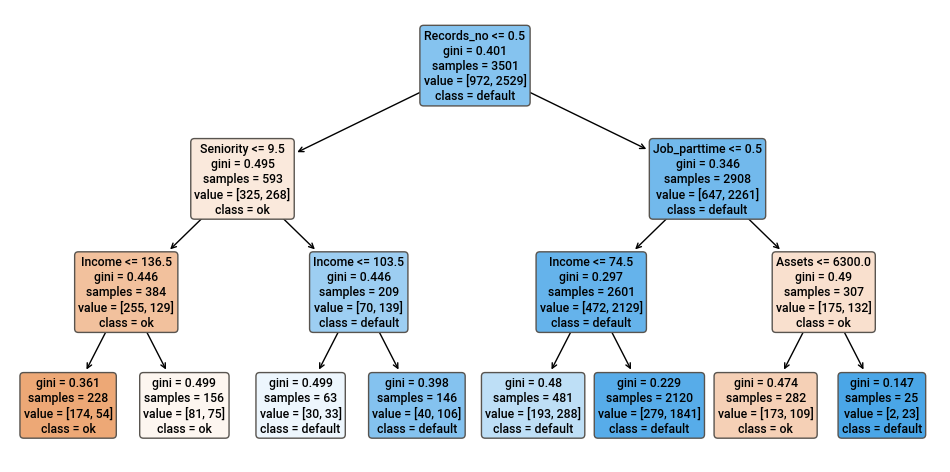

In [38]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (12,6))
plot_tree(dt, feature_names = X_train_fe.columns, 
          class_names = y_train.unique(),
          filled = True,
          rounded = True); 

In [40]:
from sklearn.tree import export_text
tree_rules = export_text(dt, feature_names = list(X_train_fe.columns))
print(tree_rules)

|--- Records_no <= 0.50
|   |--- Seniority <= 9.50
|   |   |--- Income <= 136.50
|   |   |   |--- class: default
|   |   |--- Income >  136.50
|   |   |   |--- class: default
|   |--- Seniority >  9.50
|   |   |--- Income <= 103.50
|   |   |   |--- class: ok
|   |   |--- Income >  103.50
|   |   |   |--- class: ok
|--- Records_no >  0.50
|   |--- Job_parttime <= 0.50
|   |   |--- Income <= 74.50
|   |   |   |--- class: ok
|   |   |--- Income >  74.50
|   |   |   |--- class: ok
|   |--- Job_parttime >  0.50
|   |   |--- Assets <= 6300.00
|   |   |   |--- class: default
|   |   |--- Assets >  6300.00
|   |   |   |--- class: ok



#### Evaluation

Score on training data

In [41]:
from sklearn.metrics import roc_auc_score
y_pred = dt.predict_proba(X_train_fe)[:,1]
roc_auc_score(y_train, y_pred)

0.756199078345513

Score on testing data

In [42]:
# Feature Engineering Pipeline

# Numerical Features
X_test_num = X_test[X_test.describe().columns]
X_test_num = X_test_num.fillna(0).reset_index(drop = True)

# Categorical Features
onehot_encoder = OneHotEncoder(sparse_output=False, categories = categories)

X_test_categorical = X_test[['Home', 'Marital', 'Records', 'Job']]
X_test_categorical = onehot_encoder.fit_transform(X_test_categorical)

X_test_categorical = pd.DataFrame(X_test_categorical, columns=onehot_encoder.get_feature_names_out())

# Concat num + cat features
X_test_fe = pd.concat([X_test_num, X_test_categorical], axis = 1)

In [43]:
from sklearn.metrics import roc_auc_score
y_pred = dt.predict_proba(X_test_fe)[:,1]
roc_auc_score(y_test, y_pred)

0.7460461205084253

### Predictions for new data

In [44]:
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
new_loans = pd.read_csv("CreditScoring.csv")
# Drop Status column
new_loans = new_loans.drop('Status', axis = 1)
# (this is actually the same data as above, but for the sake of this exercise let's pretend it's new and we don't know the label)

--2023-03-06 11:02:45--  https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv [following]
--2023-03-06 11:02:45--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.3’

CreditScoring.csv.3 100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2023-03-06 11:02:45 (8.41 MB/s) - ‘CreditScoring.csv.3’ saved [182489/182489]



In [45]:
# Preprocessing

# Encodings
home_enc = {
    0: 'unknown',
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
}

marital_enc = {
    0: 'unknown',
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
}

records_enc = {
    0: 'unknown',
    1: 'no',
    2: 'yes',
}

job_enc = {
    0: 'unknown',
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
}

new_loans['Home'] = new_loans['Home'].map(home_enc)
new_loans['Marital'] = new_loans['Marital'].map(marital_enc)
new_loans['Records'] = new_loans['Records'].map(records_enc)
new_loans['Job'] = new_loans['Job'].map(job_enc)

# Encode missing
for col in ['Income', 'Assets', 'Debt']:
    new_loans[col] = new_loans[col].replace(to_replace = 99999999, value = np.nan)
    
# Drop NA
new_loans = new_loans.drop(new_loans[new_loans.isna().any(axis=1)].index)

### Calculate Risk

In [48]:
# Feature Engineering Pipeline for manual ML task

# Numerical Features
X_num = new_loans[X_test.describe().columns]
X_num = X_num.fillna(0).reset_index(drop = True)

# Categorical Features
onehot_encoder = OneHotEncoder(sparse_output=False, categories = categories)

X_categorical = new_loans[['Home', 'Marital', 'Records', 'Job']]
X_categorical = onehot_encoder.fit_transform(X_categorical)

X_categorical = pd.DataFrame(X_categorical, columns=onehot_encoder.get_feature_names_out())

# Concat num + cat features
X_fe = pd.concat([X_num, X_categorical], axis = 1)

# predictions for probabilities
new_loans['Default'] = dt.predict_proba(X_fe)[:,0]

In [52]:
new_loans

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Default
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0.131604
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0.131604
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985,0.273973
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0.131604
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0.131604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020,0.131604
4451,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263,0.131604
4452,0,owner,24,37,married,no,parttime,60,90.0,3500.0,0.0,500,963,0.613475
4453,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550,0.131604


## Predictive Analytics - Auto ML

### Training

1. Upload `loans.csv` to your favorite Auto ML platform and predict columns `Status`
  * Example: [Azure Auto ML](https://azure.microsoft.com/en-us/products/machine-learning/automatedml/)

2. Deploy the trained model to an online endpoint

### Predictions for new data

In [75]:
!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
new_loans = pd.read_csv("CreditScoring.csv")
# Drop Status column
new_loans = new_loans.drop('Status', axis = 1)
# (this is actually the same data as above, but for the sake of this exercise let's pretend it's new and we don't know the label)

# Preprocessing

# Encodings
home_enc = {
    0: 'unknown',
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
}

marital_enc = {
    0: 'unknown',
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
}

records_enc = {
    0: 'unknown',
    1: 'no',
    2: 'yes',
}

job_enc = {
    0: 'unknown',
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
}

new_loans['Home'] = new_loans['Home'].map(home_enc)
new_loans['Marital'] = new_loans['Marital'].map(marital_enc)
new_loans['Records'] = new_loans['Records'].map(records_enc)
new_loans['Job'] = new_loans['Job'].map(job_enc)

# Encode missing
for col in ['Income', 'Assets', 'Debt']:
    new_loans[col] = new_loans[col].replace(to_replace = 99999999, value = np.nan)
    
# Drop NA
new_loans = new_loans.drop(new_loans[new_loans.isna().any(axis=1)].index)

--2023-03-06 11:14:59--  https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv [following]
--2023-03-06 11:14:59--  https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.5’

CreditScoring.csv.5 100%[===================>] 178.21K  --.-KB/s    in 0.02s   

2023-03-06 11:14:59 (10.9 MB/s) - ‘CreditScoring.csv.5’ saved [182489/182489]



### Caluclate Risk

In [53]:
# SECTION 0: Setup and Variables ----

# Make sure these packages are installed
import pandas as pd
import requests
import json

# Replace with your own credentials
API_KEY = "rJb1y7d0B302WYfdofe2KrlnoZoVqQRR"
API_URL = "http://c5824cbb-1836-425e-a497-9ef8bdec4809.eastus.azurecontainer.io/score"

In [54]:
# SECTION 1: API Request Function ----

def inference_request(df_inference):
  req = {
      "Inputs": {
          "data": list(df_inference.to_dict('records'))
          },
           "GlobalParameters": {
               "method": "predict_proba"
               }
         }
        
  # POST request - send JSON to API
  headers = {'Authorization': ('Bearer ' + API_KEY), 
             'Content-Type': 'application/json'}

  req = str.encode(json.dumps(req))

  result = requests.post(API_URL, data = req, headers=headers)
  return(result)

In [56]:
# SECTION 2: Data preprocessing ----

# Create subset of dataframe that only contains the attributes for prediction
df_inference = new_loans[['Seniority', 
                          'Home', 
                          'Time', 
                          'Age', 
                          'Marital', 
                          'Records', 
                          'Job', 
                          'Expenses', 
                          'Income', 
                          'Assets', 
                          'Debt', 
                          'Amount', 
                          'Price']]


In [57]:
# SECTION 3: Get Predictions ----
result = inference_request(df_inference)

In [58]:
json.loads(result.content)

{'Results': [[0.23390524372529448, 0.7660947562747056],
  [0.15707212057096404, 0.8429278794290359],
  [0.5898957723674264, 0.4101042208593184],
  [0.17770726154531696, 0.8222927384546831],
  [0.21816389511795847, 0.7818361048820415],
  [0.08223944426294387, 0.9177605557370563],
  [0.251172686687332, 0.7488273133126682],
  [0.09937826506409418, 0.9006217349359058],
  [0.2843428460752577, 0.7156571539247424],
  [0.7731630401937597, 0.22683696048356566],
  [0.11648418485502013, 0.88351581514498],
  [0.09111314264120932, 0.9088868573587907],
  [0.1290638259642551, 0.8709361740357449],
  [0.10768598661882783, 0.8923140133811721],
  [0.7849887069815383, 0.21501129572776378],
  [0.1431337925840022, 0.8568662074159977],
  [0.10893989817808718, 0.8910601018219128],
  [0.09533765772807713, 0.904662342271923],
  [0.6799798350547029, 0.32002016088134405],
  [0.20105261773292482, 0.7989473822670754],
  [0.4928942356914524, 0.5071057588899436],
  [0.09039469388667312, 0.9096053061133268],
  [0.5702

In [76]:
# SECTION 4: Data postprocessing ----
predict_probabilities = json.loads(result.content)['Results']
new_loans['Default'] = [proba[0] for proba in predict_probabilities]

In [77]:
new_loans

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Default
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0.233905
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0.157072
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985,0.589896
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0.177707
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0.218164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020,0.528654
4451,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263,0.185594
4452,0,owner,24,37,married,no,parttime,60,90.0,3500.0,0.0,500,963,0.454249
4453,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550,0.430119


## Prescriptive Analytics

How do we set up our portfolio, i.e. which credit loans should we approve or decline?

To turn this into an optimization problem, we can formulate an objective function and a set of constraints that represent the credit risk scoring problem. 

Here is one approach to formulating the problem:



**Decision variables:**

* For each loan application i, the decision variable x_i is a binary variable that indicates whether the loan is funded (x_i = 1) or not (x_i = 0).

**Objective function:**
* Maximize the sum of the expected return of all funded loans in the portfolio `E_i`

Maximize: `sum(E_i * x_i)`

**Constraints:**

* For each loan application i, the credit risk R_i associated with it must be less than or equal to the maximum credit risk allowed for that loan. 
  * `R_i * x_i <= Max_R_i, for all i`

* The decision variables x_i must be binary, i.e., x_i can only be 0 or 1.
  * `x_i in {0,1}, for all i`

* The total credit risk of the portfolio must be less than or equal to a certain limit C.
  * `sum(R_i * x_i) <= C`

* The total investment in the portfolio must be less than or equal to a certain budget B.
  * `sum(A_i * x_i) <= B`

where

- `E_i` is the expected return for loan i
- `Max_R_i` is the maximum credit risk allowed for loan i 
- `R_i` is the credit risk associated with loan i
- `A_i` is the investment amount for loan i,  
- `B` is the total budget for the portfolio.

Solving this optimization problem will give us the set of loans to invest in that maximize the expected return subject to the credit risk and budget constraints.







### Calculate Expected Return
(based on fixed interest rate for simplification)

In [78]:
new_loans['Interest'] = 0.05
new_loans['Return'] = new_loans['Amount'] * new_loans['Interest'] * new_loans['Time'] / 12

In [79]:
new_loans

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Default,Interest,Return
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0.233905,0.05,200.0
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0.157072,0.05,250.0
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985,0.589896,0.05,300.0
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0.177707,0.05,225.0
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0.218164,0.05,46.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020,0.528654,0.05,225.0
4451,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263,0.185594,0.05,237.5
4452,0,owner,24,37,married,no,parttime,60,90.0,3500.0,0.0,500,963,0.454249,0.05,50.0
4453,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550,0.430119,0.05,110.0


### Optimize actions

In [80]:
new_loans['Risk'] = round(new_loans['Amount'] * new_loans['Default'],0)

In [81]:
# Documentation: https://coin-or.github.io/pulp/
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 66.7 MB/s eta 0:00:00


In [82]:
# Start simple - let's fetch just the 10 first rows to get an intuition
loans = new_loans.head(10).copy()

In [83]:
loans

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Default,Interest,Return,Risk
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0.233905,0.05,200.0,187.0
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0.157072,0.05,250.0,157.0
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985,0.589896,0.05,300.0,1180.0
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0.177707,0.05,225.0,160.0
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0.218164,0.05,46.5,68.0
5,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645,0.082239,0.05,162.5,53.0
6,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800,0.251173,0.05,400.0,402.0
7,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093,0.099378,0.05,10.0,20.0
8,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957,0.284343,0.05,300.0,341.0
9,0,parents,48,41,married,no,parttime,90,80.0,0.0,0.0,1200,1468,0.773163,0.05,240.0,928.0


In [116]:
# Maximum allowed risk for each loan 
loans['Max_Credit_Risk'] = 1000

# Define credit risk constraints
Total_Credit_Risk_Limit = 2500
Budget_Limit = 10000

In [117]:
import pulp

# Create maximization problem object
prob = pulp.LpProblem('Credit_Risk_Scoring', pulp.LpMaximize)

In [118]:
# Define decision variables as binary
loan_vars = pulp.LpVariable.dicts('Loan', (loans.index), lowBound=0, upBound=1, cat='Binary')

In [119]:
# Define objective function
prob += pulp.lpSum([loans.loc[i, 'Return'] * loan_vars[i] for i in loans.index])

In [120]:
for i in loans.index:
    prob += loans.loc[i, 'Risk'] * loan_vars[i] <= loans.loc[i, 'Max_Credit_Risk']

# Define total credit risk constraint
prob += pulp.lpSum([loans.loc[i, 'Risk'] * loan_vars[i] for i in loans.index]) <= Total_Credit_Risk_Limit

# Define budget constraint
prob += pulp.lpSum([loans.loc[i, 'Amount'] * loan_vars[i] for i in loans.index]) <= Budget_Limit


In [121]:
# Solve optimization problem
prob.solve()

1

In [122]:
# Print optimal solution
print('Optimal solution:')
for i in loans.index:
    if loan_vars[i].value() == 1:
        print(f'Loan {i}: funded')
    else:
        print(f'Loan {i}: not funded')


Optimal solution:
Loan 0: funded
Loan 1: funded
Loan 2: not funded
Loan 3: funded
Loan 4: funded
Loan 5: funded
Loan 6: funded
Loan 7: funded
Loan 8: funded
Loan 9: funded


In [123]:
prob.objective.value()

1834.0

Assign labels back to dataframe

In [124]:
# Add new column to dataframe for decision variables
loans['Include_Loan'] = 0

# Set value of decision variables in dataframe
for i in loans.index:
    loans.loc[i, 'Include_Loan'] = loan_vars[i].value()

In [125]:
loans

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Default,Interest,Return,Risk,Max_Credit_Risk,Include_Loan
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0.233905,0.05,200.0,187.0,1000,1
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0.157072,0.05,250.0,157.0,1000,1
2,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985,0.589896,0.05,300.0,1180.0,1000,0
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0.177707,0.05,225.0,160.0,1000,1
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0.218164,0.05,46.5,68.0,1000,1
5,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645,0.082239,0.05,162.5,53.0,1000,1
6,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800,0.251173,0.05,400.0,402.0,1000,1
7,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093,0.099378,0.05,10.0,20.0,1000,1
8,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957,0.284343,0.05,300.0,341.0,1000,1
9,0,parents,48,41,married,no,parttime,90,80.0,0.0,0.0,1200,1468,0.773163,0.05,240.0,928.0,1000,1


Here are all the loans we should approve to optimize our portfolio given the constraints:

In [126]:
loans[loans['Include_Loan'] == 1]

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Default,Interest,Return,Risk,Max_Credit_Risk,Include_Loan
0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846,0.233905,0.05,200.0,187.0,1000,1
1,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658,0.157072,0.05,250.0,157.0,1000,1
3,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325,0.177707,0.05,225.0,160.0,1000,1
4,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910,0.218164,0.05,46.5,68.0,1000,1
5,1,owner,60,36,married,no,fixed,75,214.0,3500.0,0.0,650,1645,0.082239,0.05,162.5,53.0,1000,1
6,29,owner,60,44,married,no,fixed,75,125.0,10000.0,0.0,1600,1800,0.251173,0.05,400.0,402.0,1000,1
7,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093,0.099378,0.05,10.0,20.0,1000,1
8,0,owner,60,32,married,no,freelance,90,107.0,15000.0,0.0,1200,1957,0.284343,0.05,300.0,341.0,1000,1
9,0,parents,48,41,married,no,parttime,90,80.0,0.0,0.0,1200,1468,0.773163,0.05,240.0,928.0,1000,1


In [131]:
# Total Return Achieved
loans[loans['Include_Loan'] == 1]['Return'].sum()

1834.0

In [132]:
# Total Risk Used
loans[loans['Include_Loan'] == 1]['Risk'].sum()

2316.0

In [133]:
# Budget Used
loans[loans['Include_Loan'] == 1]['Amount'].sum()

7860